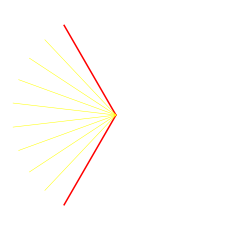

In [1]:
"""폴리곤 그래프"""
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(projection = "polar")

r = [0, 100]
theta_max = [0, np.pi*2/3]
theta_min = [0, np.pi*4/3]

result = []
for i in range(1,9):
    k = (np.pi*4/3 - np.pi*2/3)*i/9 + np.pi*2/3
    result = np.append(result, [k])


ax.plot(theta_min, r, color="red")
ax.plot(theta_max, r, color="red")
ax.axis("off")

for i in result:
    ax.plot([0,i], r, color="yellow", linewidth= "0.5")


ax.tick_params(grid_color= "white")
plt.show()



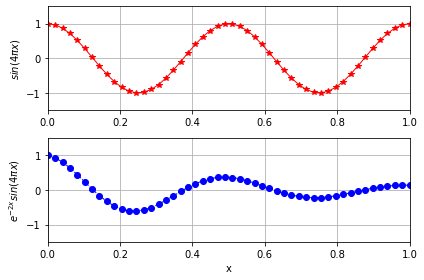

In [2]:
"""그래프두개"""
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,50)

y1 = np.cos(4*np.pi*x)
y2 = np.cos(4*np.pi*x)*np.exp(-2*x)

fig,ax = plt.subplots(2,1)

ax[0].plot(x,y1,'r-*',lw=1)
ax[0].grid(True)
ax[0].set_ylabel(r'$sin(4 \pi x)$')
ax[0].axis([0,1,-1.5,1.5])

ax[1].plot(x,y2,'b--o',lw=1)
ax[1].grid(True)
ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$ e^{-2x} sin(4\pi x) $')
ax[1].axis([0,1,-1.5,1.5])

plt.tight_layout()
plt.show()

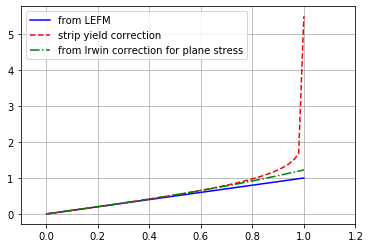

In [4]:
import numpy as np
import matplotlib.pylab as plt

x = np.linspace(0.001, 1)

y1 = x
y2 = np.sqrt((8/np.power(np.pi, 2))*np.log(1/np.cos(np.pi*x/2)))
y3 = x*np.sqrt(1+0.5*np.power(x,2))

fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()

line1 = ax1.plot(x, y1, color='b', label="from LEFM", linestyle ='-')
line2 = ax1.plot(x, y2, color='r', label="strip yield correction", linestyle ='--')
line3 = ax1.plot(x, y3, color='g', label="from Irwin correction for plane stress", linestyle='-.')

lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
plt.xlim(-0.1, 1.2)
plt.grid()
plt.legend(lines, labels, loc=0)
plt.show()




C:\Users\ghrms\anaconda3\envs\hogeun\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


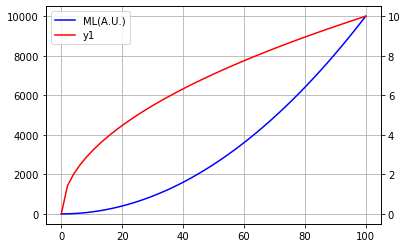

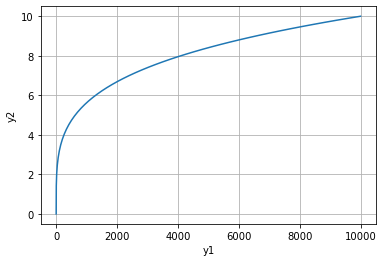

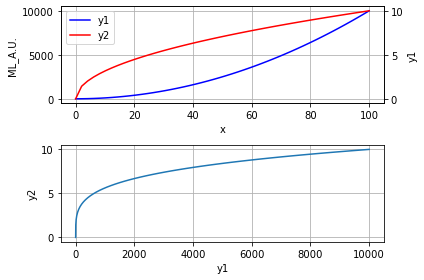

In [8]:
"""더블x축으로 다른자료 같은 x축 범위"""

import matplotlib.pyplot as plt

x = np.linspace(0,100)
y1 = x**2
y2 = np.sqrt(x)

fig, ax = plt.subplots()
ax1 = ax.twinx()
line1 = ax.plot(x, y1, color='b', label="ML(A.U.)")
line2 = ax1.plot(x, y2, color='r', label="y1")
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc=0)
ax.grid()

fig, ax2 = plt.subplots()
ax2.plot(y1, y2)
ax2.grid()
ax2.set_xlabel('y1')
ax2.set_ylabel('y2')
##############

fig, ax = plt.subplots(2, 1)
ax0 = ax[0].twinx()
ax[0].set_xlabel('x')
ax[0].set_ylabel('ML_A.U.')
ax0.set_ylabel('y1')
line1 = ax[0].plot(x, y1, color='b', label="y1")
line2 = ax0.plot(x, y2, color='r', label= "y2")

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax[0].legend(lines, labels, loc=0)
ax[0].grid()

ax[1].plot(y1, y2)
ax[1].grid()
ax[1].set_xlabel('y1')
ax[1].set_ylabel('y2')

fig.tight_layout()
fig.show()


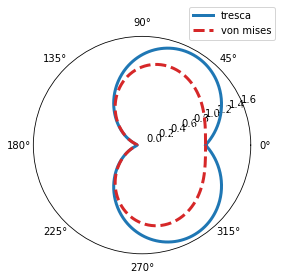

In [10]:
"""Plastic zone shape 2method"""

import matplotlib.pyplot as plt
import numpy as np


theta = np.arange(0, 2*np.pi, .01)[1:]

"""von mises criterion"""
SIF_K1 = 1211
yeild_strength = 503
von_mises = (1+np.cos(theta)+1.5*np.sin(theta)**2)*(1/(4*np.pi)*(SIF_K1/yeild_strength)**2)
tresca = SIF_K1**2/(2*np.pi*yeild_strength**2)*(np.cos(theta/2)*(1+np.sin(theta/2)))**2


fig = plt.figure()
ax = fig.add_subplot(projection = "polar")
ax.axis('on')


ax.plot(theta, tresca, color="tab:blue", lw=3, label="tresca" )
ax.plot(theta, von_mises, color="tab:red", ls="--", lw=3, label="von mises" )
ax.tick_params(grid_color="white")
angle = np.deg2rad(67.5)
ax.legend(loc="lower left",
           bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))


theta_cal = 0
von_mises_0 = (1+np.cos(theta_cal)+1.5*np.sin(theta_cal)**2)*(1/(4*np.pi)*(SIF_K1/yeild_strength)**2)
tresca_0 = SIF_K1**2/(2*np.pi*yeild_strength**2)*(np.cos(theta_cal/2)*(1+np.sin(theta_cal/2)))**2
plt.show()

In [16]:
import cv2
import numpy as np
import pandas as pd


def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append([x,y])
        print("마우스 이벤트발생, x:", x, "y", y)


img = np.random.rand(256,256)

cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

points = []
x=[]
y=[]
number = []
num=9

while(True):

    cv2.imshow('image', img)

    k=cv2.waitKey(1)&0xFF
    if k == 27:

        for i in points:
            num += 1
            number = np.append(number, num)
            x = np.append(x, i[0])
            y = np.append(y, i[1])


        break


# data_union = {'Contour N.o.': number, 'x': x, 'y' :y}
# df = pd.DataFrame(data_union)
# df.to_excel('연습용.xlsx')
cv2.destroyAllWindows()

In [ ]:
"""틱 위치설정"""

plt.tick_params(direction='in')

In [ ]:
"""피크 찾고 표시하기 점으로찾고 표시"""


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.signal import find_peaks
import sys
import glob

##################################################
path = 'G:\experiment data/a/'
save_path = 'G:\experiment data/b/'
rate = 500 #받는속도
range_front =  500 # 피크 앞뒤로 짜를 갯수
range_back = 500#
term = 10 #중간에 몇초쉬었는지
##################################################


file_list = os.listdir(path)
count = 1
if not file_list:
    print('경로확인')
    sys.exit()

for file_name in file_list:

    print(file_name, "시작!")
    df = pd.read_csv(os.path.join(path, file_name), sep='\t', header=None)  # encoding='CP949', sep= ''
    data = np.array(df)

    load = data[:, 8:9]
    dis = data[:, 9:10]
    x = np.arange(np.shape(load)[0])
    block = dis.flatten() * -1   #displacement 로 피크 잡을시 dis변수사용  load사용하고 싶을시 load변수변경
    peaks, _ = find_peaks(block, distance= term*rate) #peak 받아냄
    peaks = np.delete(peaks,-1) #거리로하다보면 마지막 요소 생기는데 이거 삭제

    for i in peaks[0:len(peaks)]: # 첫번째 그래프빼고싶으면 1:len~~
        plt.axvspan(i - range_front, i + range_back, alpha=0.1, color='green')
        result = data[i-range_front:i+range_back+1 ,:]
        np.savetxt(save_path+file_name.split('.')[0]+'_'+str(count)+'.'+file_name.split('.')[1], result, delimiter='\t', fmt='%4e')
        count += 1
    plt.plot(block*-1,c = 'black', linewidth=0.5)
    plt.plot(peaks, block[peaks]*-1, "x", c='red')
    plt.savefig(save_path+file_name.split('.')[0]+'check.png', dpi=300)
print('끄으으으으으으으읕')